In [21]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import re

In [32]:
df = pd.read_csv('Data2.csv')
df.head()

,Id,Age,Title,Review Text
0,0,33,NaN,Absolutely wonderful - silky and sexy and comf...
1,1,34,NaN,Love this dress! it's sooo pretty. i happene...
2,2,60,Some major design flaws,I had such high hopes for this dress and reall...
3,3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,4,47,Flattering shirt,This shirt is very flattering to all due to th...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           23486 non-null  int64 
 1   Age          23486 non-null  int64 
 2   Title        19676 non-null  object
 3   Review Text  22641 non-null  object
dtypes: int64(2), object(2)
memory usage: 734.1+ KB


In [33]:
df = df.dropna(subset=['Title', 'Review Text'], how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22642 entries, 0 to 23485
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           22642 non-null  int64 
 1   Age          22642 non-null  int64 
 2   Title        19676 non-null  object
 3   Review Text  22641 non-null  object
dtypes: int64(2), object(2)
memory usage: 884.5+ KB


In [34]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Title'] = df['Title'].apply(clean_text)
df['Review Text'] = df['Review Text'].apply(clean_text)

In [35]:
df['Review'] = df['Title'] + ' ' + df['Review Text']

In [36]:
df = df.drop(['Id', 'Title', 'Review Text'], axis=1)

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = [word for word in str(text).split() if word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

df['Review'] = df['Review'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Age,Review
0,33,absolutely wonderful silky sexy comfortable
1,34,love dress sooo pretty happened find store im ...
2,60,major design flaw high hope dress really wante...
3,50,favorite buy love love love jumpsuit fun flirt...
4,47,flattering shirt shirt flattering due adjustab...


In [41]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment_TextBlob'] = df['Review'].apply(analyze_sentiment)

df.head()

,Age,Review,Sentiment_TextBlob
0,33,absolutely wonderful silky sexy comfortable,0.633333
1,34,love dress sooo pretty happened find store im ...,0.318750
2,60,major design flaw high hope dress really wante...,0.081439
3,50,favorite buy love love love jumpsuit fun flirt...,0.500000
4,47,flattering shirt shirt flattering due adjustab...,0.458333


In [42]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['Sentiment_Vander_Lexicon'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [45]:
df.head(10)

,Age,Review,Sentiment_TextBlob,Sentiment_Vander_Lexicon
0,33,absolutely wonderful silky sexy comfortable,0.633333,0.8991
1,34,love dress sooo pretty happened find store im ...,0.318750,0.9710
2,60,major design flaw high hope dress really wante...,0.081439,0.9081
3,50,favorite buy love love love jumpsuit fun flirt...,0.500000,0.9587
4,47,flattering shirt shirt flattering due adjustab...,0.458333,0.9274
5,49,petite love tracy reese dress one petite foot ...,0.150000,0.9153
6,39,cagrcoal shimmer fun aded basket hte last mint...,0.120500,0.8173
7,39,shimmer surprisingly go lot ordered carbon sto...,0.259135,0.7089
8,24,flattering love dress usually get x run little...,-0.046875,0.8316
9,34,fun dress im lb ordered petite make sure lengt...,0.219841,0.9732


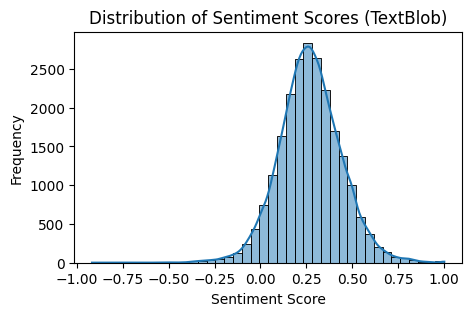

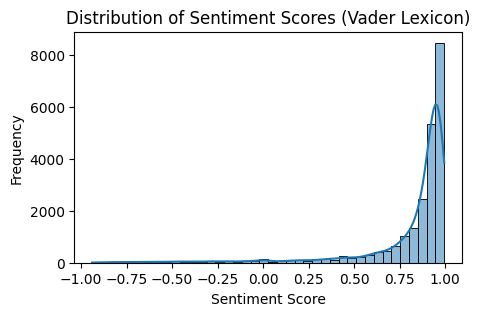

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.histplot(df['Sentiment_TextBlob'], bins=40, kde=True) # Using TextBlob sentiment
plt.title('Distribution of Sentiment Scores (TextBlob)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(5,3))
sns.histplot(df['Sentiment_Vander_Lexicon'], bins=40, kde=True) # Using Vader Lexicon sentiment
plt.title('Distribution of Sentiment Scores (Vader Lexicon)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [54]:
df['Sentiment_Bins'] = pd.cut(df['Sentiment_TextBlob'], bins=[-1, -0.5, 0.09, 0.6, 1], labels=['Very Negative', 'Negative', 'Positive', 'Very Positive'])
df.head()

,Age,Review,Sentiment_TextBlob,Sentiment_Vander_Lexicon,Sentiment_Bins
0,33,absolutely wonderful silky sexy comfortable,0.633333,0.8991,Very Positive
1,34,love dress sooo pretty happened find store im ...,0.318750,0.9710,Positive
2,60,major design flaw high hope dress really wante...,0.081439,0.9081,Negative
3,50,favorite buy love love love jumpsuit fun flirt...,0.500000,0.9587,Positive
4,47,flattering shirt shirt flattering due adjustab...,0.458333,0.9274,Positive


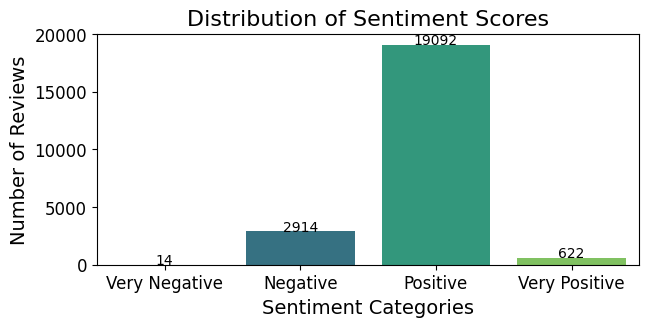

In [60]:
sentiment_counts = df['Sentiment_Bins'].value_counts().sort_index()

plt.figure(figsize=(7, 3))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis", hue=sentiment_counts.index, legend=False)
for i, count in enumerate(sentiment_counts.values):
  ax.text(i, count + 0.5, str(count), ha='center', fontsize=10, color='black')
plt.title("Distribution of Sentiment Scores", fontsize=16)
plt.xlabel("Sentiment Categories", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [67]:
df['Review_Length'] = df['Review'].apply(len)
df.groupby('Sentiment_Bins')['Review_Length'].mean()

<ipython-input-67-f157403ff526>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Sentiment_Bins')['Review_Length'].mean()


,Review_Length
Sentiment_Bins,
Very Negative,84.357143
Negative,207.300618
Positive,197.525246
Very Positive,97.382637


<ipython-input-68-d78528c28dc5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Review_Length'], shade=True)


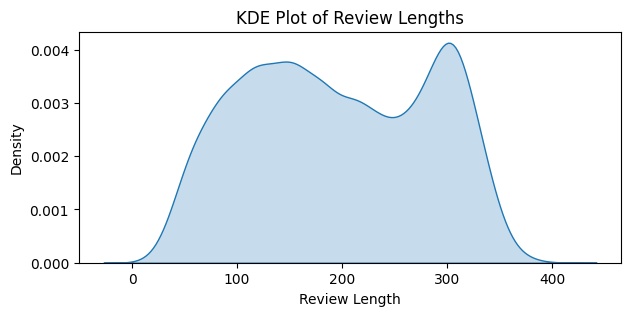

In [68]:
plt.figure(figsize=(7, 3))
sns.kdeplot(df['Review_Length'], shade=True)
plt.title('KDE Plot of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.show()

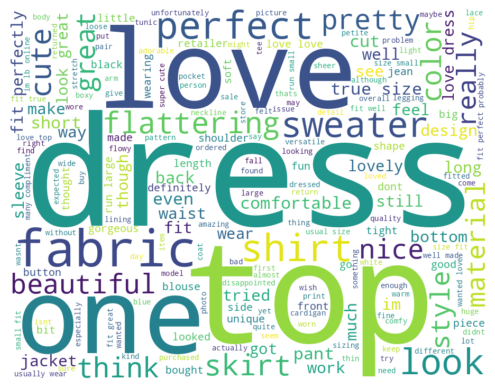

In [71]:
from wordcloud import WordCloud

text = ' '.join(df['Review'])
wordcloud = WordCloud(width=900, height=700, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [83]:
age_bins = [20, 30, 40, 50, 60, 70]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=["20s", "30s", "40s", "50s", "60s"])
sentiment_by_age = df.groupby('Age_Group')['Sentiment_TextBlob'].mean()
sentiment_by_age

<ipython-input-83-4b32eb041443>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_age = df.groupby('Age_Group')['Sentiment_TextBlob'].mean()


,Sentiment_TextBlob
Age_Group,
20s,0.273254
30s,0.267422
40s,0.267263
50s,0.274342
60s,0.273241


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(df['Review'])
vectorizer.get_feature_names_out()

array(['beautiful', 'color', 'cute', 'dress', 'fabric', 'fit',
       'flattering', 'great', 'im', 'like', 'little', 'look', 'love',
       'ordered', 'perfect', 'really', 'size', 'small', 'soft', 'wear'],
      dtype=object)

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

negative_reviews = df[df['Sentiment_Bins'] == 'Negative']['Review']

vectorizer = TfidfVectorizer(max_features=30, stop_words='english')
X = vectorizer.fit_transform(negative_reviews)

top_terms = vectorizer.get_feature_names_out()
tfidf_scores = X.toarray().mean(axis=0)

import pandas as pd
terms_df = pd.DataFrame({'Term': top_terms, 'Score': tfidf_scores})
terms_df = terms_df.sort_values(by='Score', ascending=False)

terms_df

,Term,Score
4,dress,0.142496
8,like,0.114827
21,size,0.109340
22,small,0.109164
11,look,0.091581
5,fabric,0.084598
1,color,0.082294
29,wear,0.081107
7,im,0.080383
6,fit,0.079503


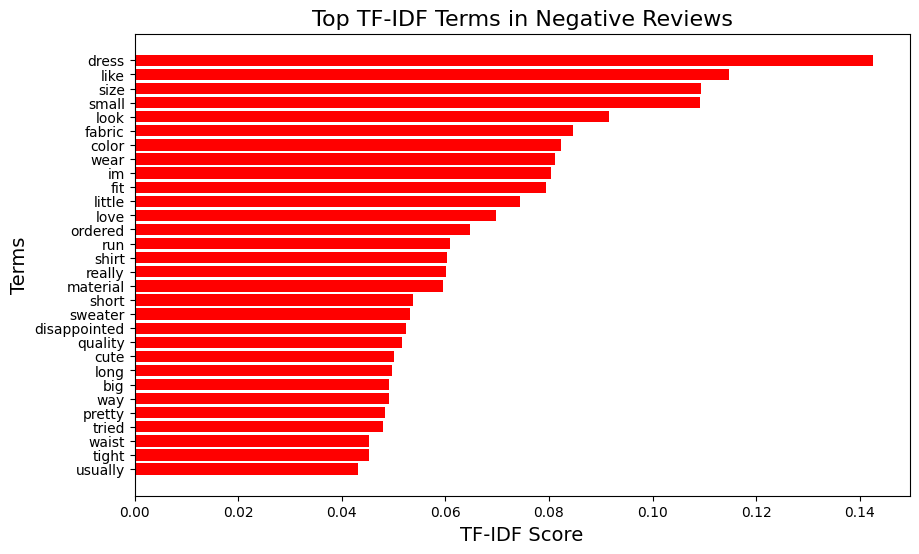

In [86]:
plt.figure(figsize=(10, 6))
plt.barh(terms_df['Term'], terms_df['Score'], color='red')
plt.title('Top TF-IDF Terms in Negative Reviews', fontsize=16)
plt.xlabel('TF-IDF Score', fontsize=14)
plt.ylabel('Terms', fontsize=14)
plt.gca().invert_yaxis()
plt.show()